## 1st task

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from pylab import *
%matplotlib inline

df = pd.read_excel('Analyst_Data.xls', header=None, squeeze=True)
df.dropna(inplace=True)
df.head(5)

0    44
1    28
2    48
3    32
4    38
Name: 0, dtype: int64

In [369]:
def stats(x):
    result = []
    result.append(len(x)) # Чисо элементов выборки
    result.append((np.min(x), np.max(x))) # (min, max)    
    result.append(np.mean(x)) # среднее
    result.append(st.mode(x))  # мода
    result.append(np.median(x))  # медиана
    result.append(np.var(x, ddof=1))  # дисперсия    
    result.append(np.std(x, ddof=1)) # ско    
    result.append(np.max(x) - np.min(x)) # (размах)
    result.append(st.skew(x))  # асимметрия 
    result.append(st.kurtosis(x))  # эксцесс
    result.append(st.gaussian_kde(x)) # плотность
    return tuple(result)

n, minmax, mean, moda, median, var, std, maxmin, skew, kurt, density = stats(df)

print('Число элементов выборки: {0:d}'.format(n))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Среднее значение: {0:.4f}'.format(mean))
print('Мода: {0:.4f}'.format(moda[0][0]))
print('Медиана: {0:.4f}'.format(median))
print('Дисперсия: {0:.4f}'.format(var))
print('Стандартное отклонение: {0:.4f}'.format(std))
print('Размах: {0:.4f}'.format(maxmin))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

print(stats(df))
print(st.mode(df))

Число элементов выборки: 500
Минимальное и максимальное значения: (0.0000, 50.0000)
Среднее значение: 24.9800
Мода: 21.0000
Медиана: 23.0000
Дисперсия: 221.9555
Стандартное отклонение: 14.8982
Размах: 50.0000
Коэффициент асимметрии: 0.0760
Коэффициент эксцесса: -1.2409
(500, (0, 50), 24.98, ModeResult(mode=array([21]), count=array([16])), 23.0, 221.95551102204425, 14.898171398599368, 50, 0.07597472923269545, -1.2409331284484417, <scipy.stats.kde.gaussian_kde object at 0x1258bf320>)
ModeResult(mode=array([21]), count=array([16]))


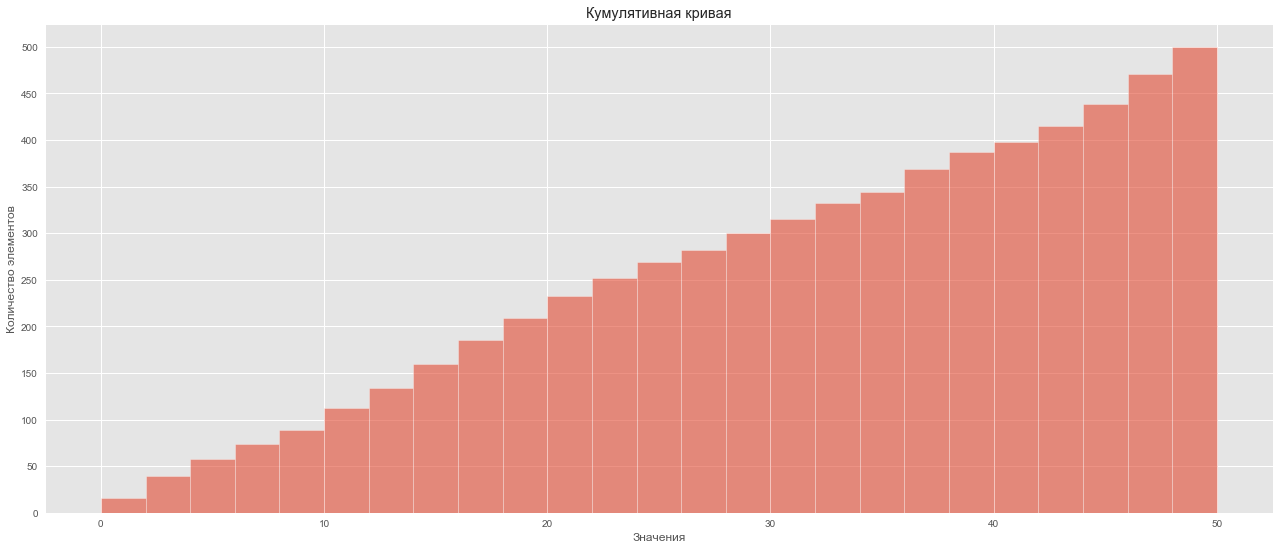

In [370]:
df.hist(figsize=(22, 9), bins=25, ec='w', cumulative=True, alpha=.6)
ls = range(0, 550, 50)
plt.yticks(range(0, 550, 50))
##plt.xticks(range(0, 55, 5))
plt.ylabel('Количество элементов')
plt.xlabel('Значения')
plt.title('Кумулятивная кривая')
plt.show()

([<matplotlib.axis.XTick at 0x12c97dac8>,
 <a list of 11 Text xticklabel objects>)

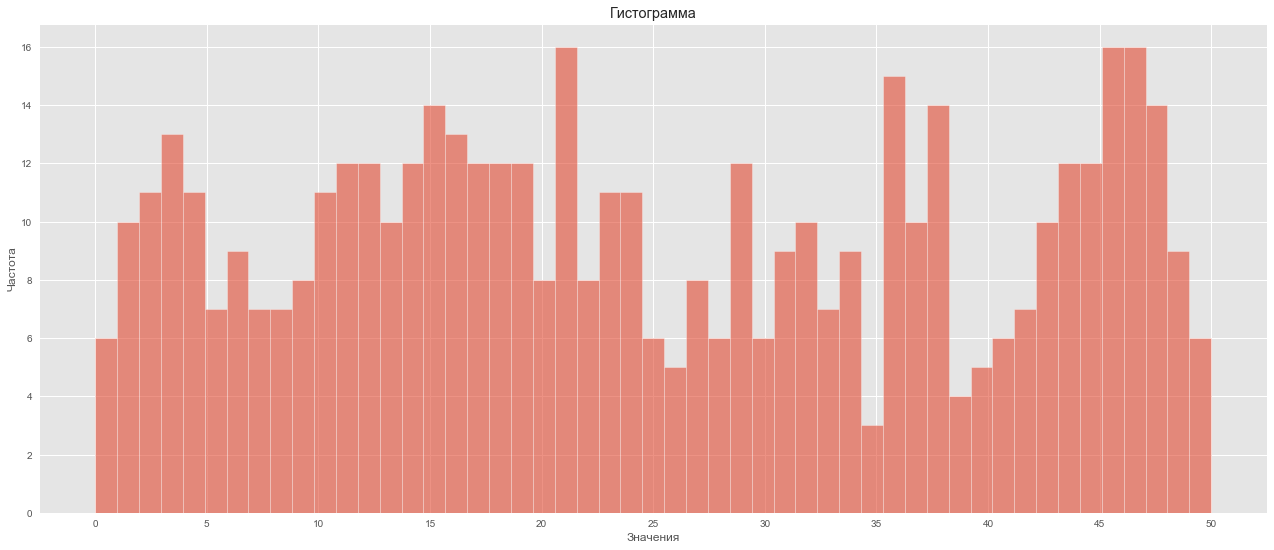

In [371]:
df.hist(figsize=(22, 9), bins=51, ec='w', alpha=.6)
plt.ylabel('Частота')
plt.xlabel('Значения')
plt.title('Гистограмма')
plt.xticks(range(0, 55, 5))

{'boxes': [<matplotlib.lines.Line2D at 0x12f458978>],
 'caps': [<matplotlib.lines.Line2D at 0x12f43fda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12f449d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12f446e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12f458b70>,
  <matplotlib.lines.Line2D at 0x12f43fba8>]}

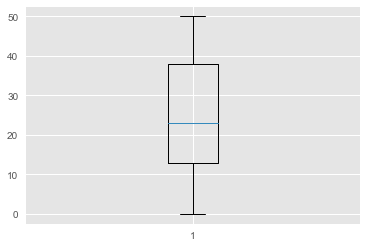

In [372]:
plt.boxplot(df)

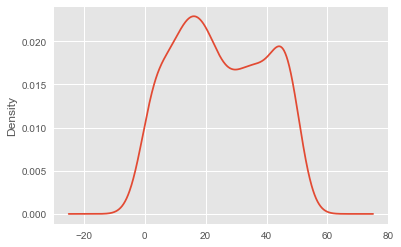

In [373]:
df.plot.kde()

([<matplotlib.axis.XTick at 0x12f4112e8>,
 <a list of 11 Text xticklabel objects>)

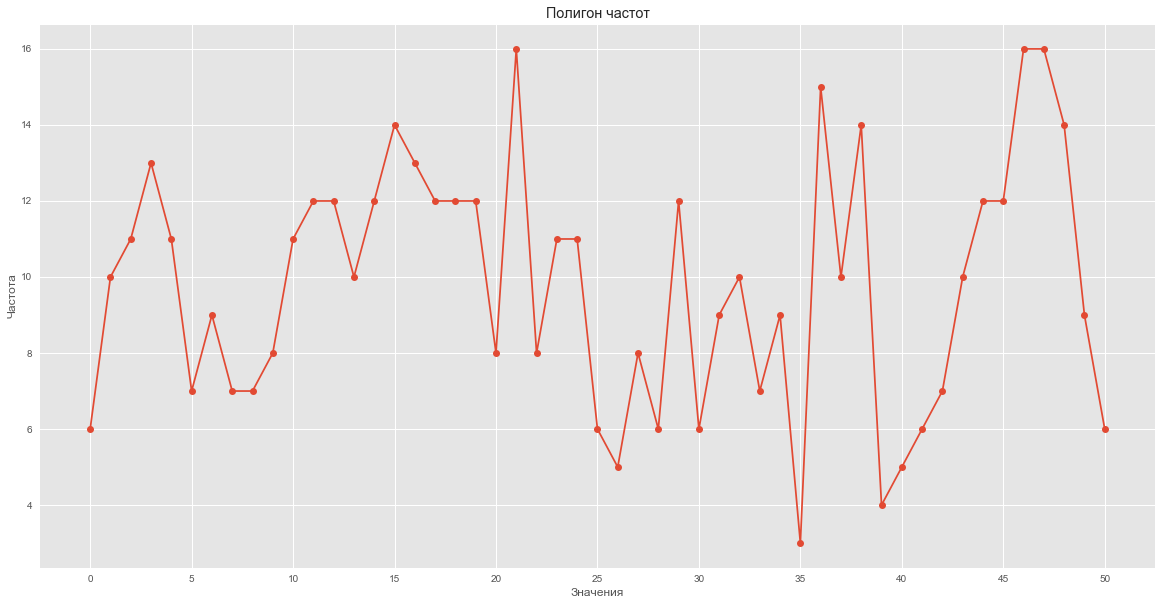

In [377]:
a = np.histogram(df, bins=range(0,52))
y = a[0]
x = a[1][:51]
fig, ax = plt.subplots(figsize=(20, 10)) 
plt.plot(x,y, marker='o')
plt.ylabel('Частота')
plt.xlabel('Значения')
plt.title('Полигон частот')
plt.xticks(range(0, 55, 5))

([<matplotlib.axis.XTick at 0x1352a1160>,
 <a list of 11 Text xticklabel objects>)

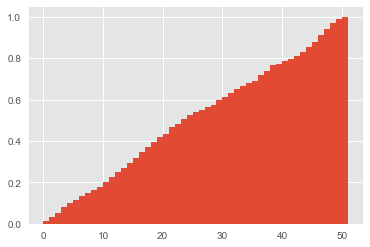

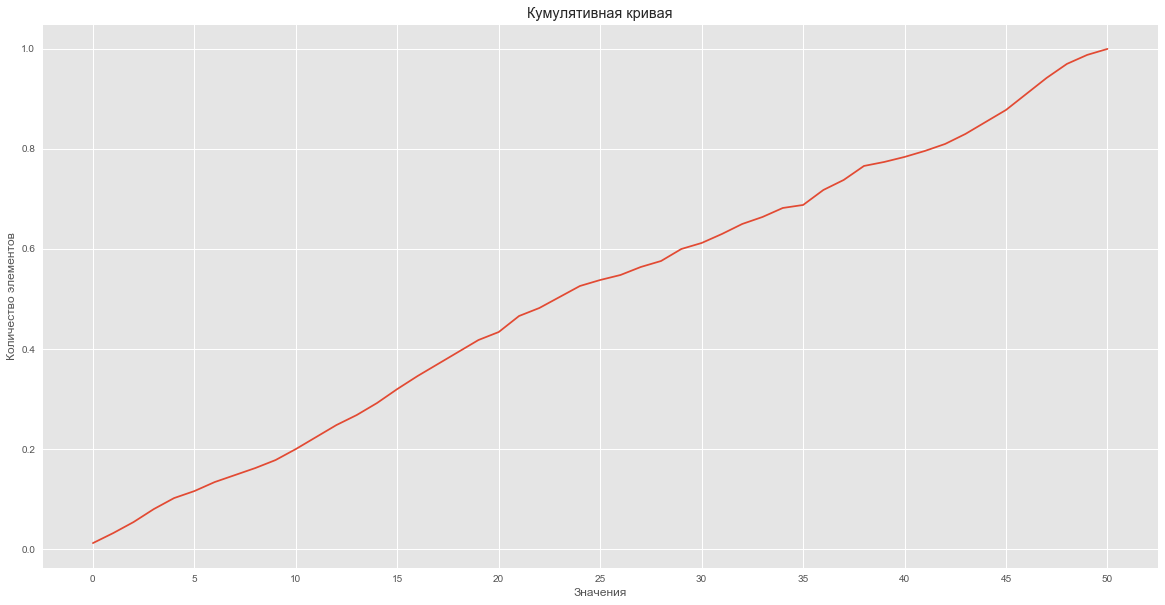

In [380]:
a = plt.hist(df, bins=range(0,52), normed=True, cumulative=True)
y = a[0]
x = a[1][:51]
fig, ax = plt.subplots(figsize=(20, 10)) 
plt.plot(x,y)
plt.ylabel('Количество элементов')
plt.xlabel('Значения')
plt.title('Кумулятивная кривая')
plt.xticks(range(0, 55, 5))